In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
x= data.iloc[:,3:].values

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


# Building Cluster Basis K - Means approach

In [37]:
from sklearn.cluster import KMeans

var = []
for i in range(1,14):
    km = KMeans(n_clusters=i , random_state=3)
    km.fit(x)
    var.append(km.inertia_)

In [38]:
l=[]
for i in range(1,14):
    l.append(i)

<Axes: >

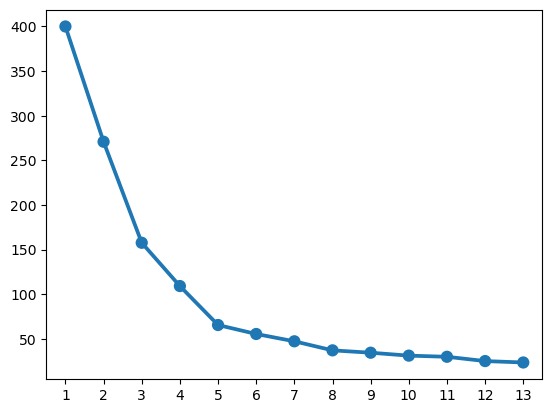

In [39]:
sns.pointplot(x=l, y=var)

In [41]:
k_means = KMeans(n_clusters=5 , random_state=3)
k_means.fit(x)
labels = k_means.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [42]:
from sklearn.metrics import silhouette_samples , silhouette_score


In [43]:
silhouette_score(x , labels , random_state=3)

0.5539423799434205

In [50]:
combined = pd.concat([data , pd.DataFrame(labels)] , axis = 1)

In [57]:
combined = combined.rename(columns= {0:"Cluster"})

In [58]:
combined

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [60]:
combined.to_csv('mall_customer_final_cluster.csv')

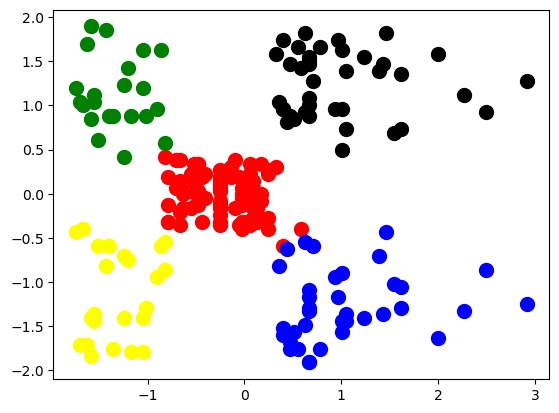

In [67]:
plt.scatter(x[labels == 0 ,0 ] , x[labels == 0,1] , s = 100 , c = 'red' , label = 'Cluster1')
plt.scatter(x[labels == 1 ,0 ] , x[labels == 1,1] , s = 100 , c = 'blue' , label = 'Cluster2')
plt.scatter(x[labels == 2 ,0 ] , x[labels == 2,1] , s = 100 , c = 'black' , label = 'Cluster3')
plt.scatter(x[labels == 3 ,0 ] , x[labels == 3,1] , s = 100 , c = 'green' , label = 'Cluster4')
plt.scatter(x[labels == 4 ,0 ] , x[labels == 4,1] , s = 100 , c = 'yellow' , label = 'Cluster5')


plt.show()

# Hierarchal Cluster

In [68]:
from scipy.cluster.hierarchy import dendrogram , linkage

link_method = linkage(x)
link_method

array([[4.80000000e+01, 4.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.56000000e+02, 1.58000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+02, 1.74000000e+02, 3.81694292e-02, 2.00000000e+00],
       [6.30000000e+01, 2.01000000e+02, 3.81694292e-02, 3.00000000e+00],
       [5.10000000e+01, 5.30000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.01000000e+02, 1.09000000e+02, 3.81694292e-02, 2.00000000e+00],
       [9.20000000e+01, 9.90000000e+01, 3.81694292e-02, 2.00000000e+00],
       [9.80000000e+01, 1.05000000e+02, 3.81694292e-02, 2.00000000e+00],
       [9.40000000e+01, 2.09000000e+02, 3.81694292e-02, 3.00000000e+00],
       [1.07000000e+02, 1.13000000e+02, 3.81694292e-02, 2.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.50000000e+02, 1.54000000e+02, 3.88215607e

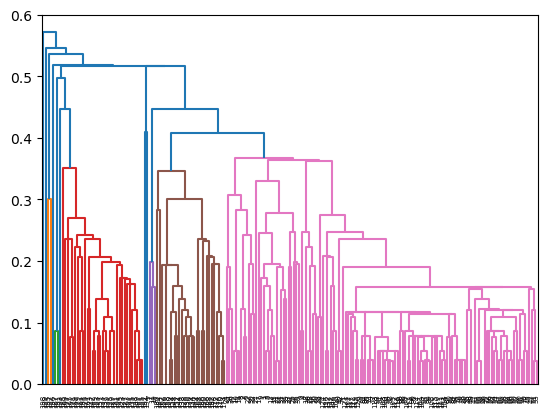

In [69]:
dend = dendrogram(link_method, p = 10)

In [71]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(link_method , 5 , criterion='maxclust')
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1,
       5, 4], dtype=int32)

In [72]:
data['d_cluster'] = cluster

In [73]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),d_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,5
